# Logistic Regression for Binary Classification


<img style="float: left;" width="500" src="images/linear_vs_logistic_regression.png">


* In statistics, the logistic model uses a logistic function to model a **binary dependent variable**
    * This method can be extended to Multinomial and Ordinal cases
* The dependent variable in logistic regression follows Bernoulli Distribution
* Estimation is done through **maximum likelihood**
* Hypotesis is the sigmoid function:

$$h_\theta = \sigma(z)$$
* The Logistic Regression model is basicaly:

$$\hat{y} = \sigma(\theta \cdot x)$$

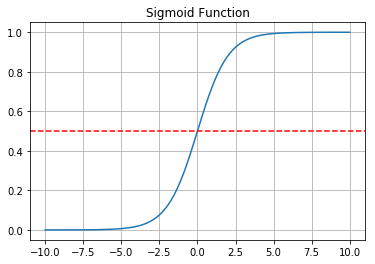

In [1]:
%matplotlib inline
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data manipulation 
import pandas as pd
import numpy as np

# define sigmoid function
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

# plot sigmoid from -10 to 10
x = np.linspace(-10, 10, 100)
y = sigmoid(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axhline(y=0.5, linestyle = '--', color='r')
plt.title('Sigmoid Function')
plt.grid()

## Decision Boundary

* The current prediction function returns a continuous probability score between 0 and 1
* The output can be compared to some threshold in order to define the corresponding class
* Usually, to be consistent to the function simetry, 0.5 is defined as the treshold
* Decision boundary can be also non-linear or linear higher polynomial order

## Classification

* The classification rule consists in applying the decision boundary:
    * Classify as 1 if the predicted_value ≥ 0.5. Classify as 0 otherwise.


In [2]:
def predict(features, weights):
    # Returns array of probabilities fot the class label == 1
    # Implementation of Logistic Regression model
    z = np.dot(features, weights)
    return sigmoid(z)

def decision_boundary(prob):
    # implementation of decision boundary
    return 1 if prob >= .5 else 0

def classify(predictions):
    # classify examples based on the decision boundary criterion
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

## Loss Function

* Our hypotesis function is non-linear (due to sigmoid transform)
* Squaring this function (as is done in MSE) results in a non-convex function with many local minimums
* The optimization method (e.g. Gradien Descent) may not find the optimal solution if the cost function has multiple local minimums
* In Logistic Regression, **cross entropy** is used as Loss function:

$$ J(\theta) = \sum_{i=1}^{m}y_{i}\log(h_{\theta}(x_{i})) + (1-y_{i})\log(1-h_{\theta}(x_{i})) $$

* And the Loss function derivative is given by (the proof is on the bottom of this notebook):

$$ \frac{\partial J(\theta)}{\partial\theta} = \sum_{i=1}^m (h_{\theta}(x_{i}) -y_{i})x_{i} $$

In [3]:
def loss_function(features, labels, weights):

    observations = len(labels)
    predictions = predict(features, weights)

    loss = labels*np.log(predictions)  + (1 - labels)*np.log(1 - predictions)
    loss = - loss.sum() / observations # average loss

    return loss

## Gradient Descent

* Consider you have a dataset with $m$ examples and want to fit a model using Linear Regression

* In Gradient Descent we want to find the parameter vector $\theta$ that minimize the Loss function $J$

* The algorithm consists in updating, for each feature $i = 1, ..., n-1$, the parameter values:

\begin{equation} \theta' = \theta - \alpha \frac{\partial J(\theta)}{\partial \theta_i} \end{equation}

* Where $\alpha$ is the learning rate, that represents how much the parameters will change in the oposite direction of the gradient

* For the cross-entropy Loss, the weight update rule is given by:

$$ \theta' := \theta - \alpha \sum_{i=1}^m (h_{\theta}(x_{i}) -y_{i})x_{i} $$

In [4]:
def gradient_descent(features, labels, weights, learning_rate):
    N = len(features)
    predictions = predict(features, weights)

    # compute the average cost derivative for each feature
    gradient = np.dot(features.T,  predictions - labels)/N

    # update the weights to minimize cost
    weights -= learning_rate * gradient

    return weights

## Train

* Training consists in updating the weights in order to minimize the cost function
    * i.e. apply Gradient Descent
* The learning algorithm search the set of possible hypotheses for the best parameterization

In [5]:
def train(features, labels, lr, iters):
    loss_history = [] # to keep track of loss
    weights = np.zeros(features.shape[1]) # weight vector must have same dimension as feature vector
    for i in range(iters):
        weights = gradient_descent(features, labels, weights, lr)

        #Calculate error for auditing purposes
        loss = loss_function(features, labels, weights)
        loss_history.append(loss)

        # Log Progress
        if i % 40 == 0:
            print("iter: "+str(i) + " loss: "+str(loss))

    return weights, loss_history

## Run

* In order to show the algorithm working, Iris dataset will be used
    * Iris dataset was adapted to work with binary classification is used (the third class examples were removed)
* The intention is to show how the algorithm works, not how to solve the problem
* In this same notebook a more detailed application example is provided for breast cancer prediction


In [6]:
from sklearn import datasets

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['type'] = iris.target
df = df[df['type'] != 2].reset_index(drop=True).head(50)

x = df.drop('type', axis = 1).values # input is the features without Iris species (type)
y = df['type'].values # output is the Iris specie

alpha = 0.1
iterations = 200
w, loss_history = train(x, y, alpha, iterations)

iter: 0 loss: 0.1341215034130802
iter: 40 loss: 0.006289713861384161
iter: 80 loss: 0.0032653703335711664
iter: 120 loss: 0.0022101624041900615
iter: 160 loss: 0.0016721299705409266


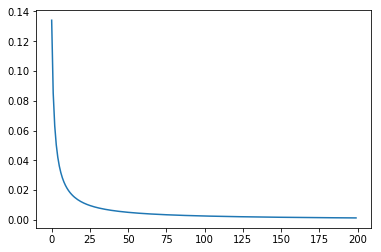

In [7]:
plt.plot(loss_history)

## Example: Breast Cancer Wisconsin Dataset

* Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass
* They describe characteristics of the cell nuclei present in the image


<img style="float: left;" width="500" src="images/biopsy.jpg">

 ### Attribute Information:

* Output:

    * Diagnosis (M = malignant, B = benign) 

* Ten real-valued features are computed for each cell nucleus: 
    1. radius (mean of distances from center to points on the perimeter) 
    2. texture (standard deviation of gray-scale values) 
    3. perimeter 
    4. area 
    5. smoothness (local variation in radius lengths) 
    6. compactness (perimeter^2 / area - 1.0) 
    7. concavity (severity of concave portions of the contour) 
    8. concave points (number of concave portions of the contour) 
    9. symmetry 
    10. fractal dimension ("coastline approximation" - 1)
    
* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

* All feature values are recoded with four significant digits.

* Class distribution: 357 benign, 212 malignant

In [8]:
# import dataset from library
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()

# convert into pandas dataframe (structured table)
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['diagnosis'] = cancer_data.target

df.head() #print first 5 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Feature selection

* Analysing the features is specially important for datasets with many features
    * There is a higher chance of not relevant features
* The most elementary analisys for determining features that can be removed consists in looking for:
    * Features presenting low correlation with respect to the target:
        * These are not useful to model the data
    * Features presenting high correlation with respect to other feature
        * The contribution from this feature to the model is somehow provided by the other feature (it is like a duplicate)

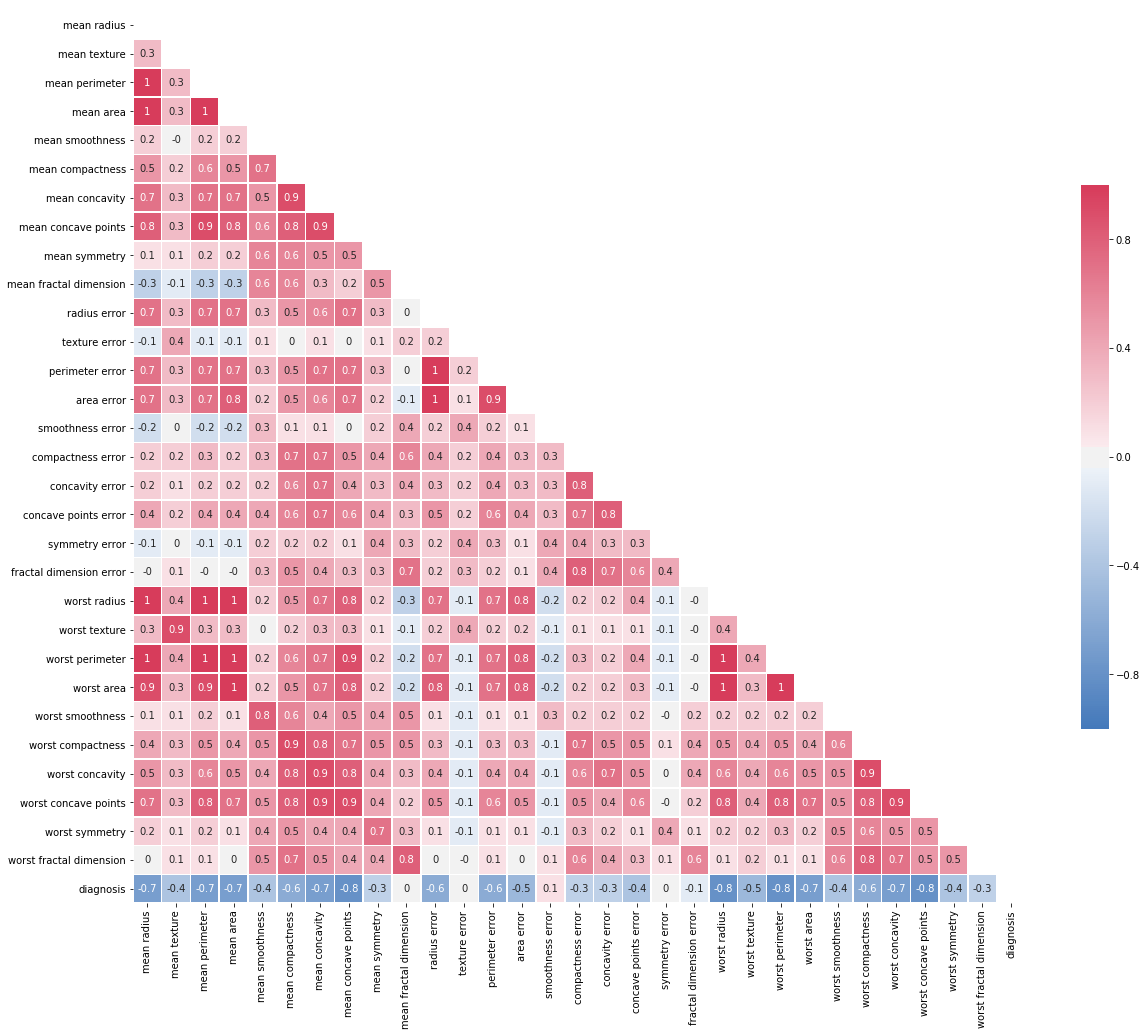

In [9]:
# plot of the correlation matrix

# first step: compute the correlation matrix
corr = df.corr().round(1)

# set the upper triangle values as zeros for better visualization
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# colormap based on red/blue colors
cmap = sns.diverging_palette(250, 5, as_cmap=True)

plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

#### Correlation matrix analisys

* Some features in this dataset are higly correlated:
    * As perimeter and area are a function of the radius, it is not necessary to keep them all
        * This becomes clear when we realize that the correlation between features containing perimeter, area or radius is close to 1
    * In general, the 'mean' and 'worst' columns for the same feature are higly correlated
    * 'concave' and 'concavity' features' correlation is also close to 1

* Also the columns `"mean fractal dimension", "texture error", "smootheness error" and "symetry error"` have correlation with respect to the target `diagnosis` close to 0


* Lets remove all the columns containing `"worst", "perimeter", "area", "concavity" and "fractal"` and also the columns `"smoothness error" and "symmetry error"`



In [10]:
# drop unwanted columns

for drop_attribute_string in ["worst", "perimeter", "area", "concavity", "fractal"]:
    matching_cols = [s for s in df.columns if drop_attribute_string in s]
    df = df.drop(matching_cols, axis=1)
df = df.drop(["smoothness error", "symmetry error"], axis=1)
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean concave points,mean symmetry,radius error,texture error,compactness error,concave points error,diagnosis
0,17.99,10.38,0.11840,0.27760,0.14710,0.2419,1.0950,0.9053,0.04904,0.01587,0
1,20.57,17.77,0.08474,0.07864,0.07017,0.1812,0.5435,0.7339,0.01308,0.01340,0
2,19.69,21.25,0.10960,0.15990,0.12790,0.2069,0.7456,0.7869,0.04006,0.02058,0
3,11.42,20.38,0.14250,0.28390,0.10520,0.2597,0.4956,1.1560,0.07458,0.01867,0
4,20.29,14.34,0.10030,0.13280,0.10430,0.1809,0.7572,0.7813,0.02461,0.01885,0


### Split into train and test datasets

* Having a testing set with examples unknown by the model allow a better evaluation

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

x = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

### Train (fit) the model using the training examples

* Instead of using the model we developed above, lets use sklearn library
    * It is easier and better optimized

In [12]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

print('Finished training')

Finished training


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Prediction

* Predict the values for the `x_test` examples
* sklearn `LogisticRegression.predict()` method already provides classes as prediction (categorical values)
    * No threshold comparison is needed
* The predictions are numbers (basically 0s and 1s)
* Labels can be assigned to the corresponding classes if wanted

In [13]:
# numerical predictions
y_hat = logmodel.predict(x_test)
print('Numerical predictions', y_hat[:5])

# assign predictions with labels
prediction_labels = [ "M" if value == 0 else "B" for value in y_hat]
print('Labelled predictions', prediction_labels[:5])

Numerical predictions [1 1 1 1 0]
Labelled predictions ['B', 'B', 'B', 'B', 'M']


### Evaluation

* Many different methods can be used to evaluate classification results:
    * Accuracy (ACC)
    * Balanced Accuracy (BACC)
    * F1 Score
    * Matthews Correlation Coefficient (MCC)
    * Confusion matrix

#### Accuracy 

* Accuracy (ACC) is the ratio between correct classification values and the total number of examples
* In the bynary case, can be also defined as the ratio between True Positives + True Negatives by the total Positive + Negative examples:

$$ {\mathit  {ACC}}=({\mathit  {TP}}+{\mathit  {TN}})/(P+N) $$


#### Confusion matrix

* Confusion matrix  is a table with two rows and two columns containing:
    * false positives, false negatives, true positives, and true negatives. 
* Allows more detailed analysis than mere proportion of correct classifications (accuracy)
* Accuracy is not a reliable metric when the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly). 
    * For example, if there were 95 cats and only 5 dogs in the data, a particular classifier might classify all the observations as cats. 
        * The overall accuracy would then be 95%, even not predicting any dog correctly

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

conf_matrix = confusion_matrix(y_test, y_hat) #computes the confusion matrix
accuracy = accuracy_score(y_test, y_hat) #computes accuracy

print('True Negative:', conf_matrix[0][0])
print('False Positive:', conf_matrix[0][1])
print('False Negative:', conf_matrix[1][0])
print('True Positive:', conf_matrix[1][1])
print('Accuracy:', round(accuracy * 100, 1), '%')

True Negative: 30
False Positive: 9
False Negative: 0
True Positive: 75
Accuracy: 92.1 %


## References

[1] Mangasarian, Olvi L., and William H. Wolberg. Cancer diagnosis via linear programming. University of Wisconsin-Madison Department of Computer Sciences, 1990.

[2] https://en.wikipedia.org/wiki/Confusion_matrix

[3] http://thegrandjanitor.com/2015/08/20/gradient-descent-for-logistic-regression/

### $J(\theta)$ gradient proof:

* Our loss function is the cross-entropy:

$$ J(\theta) = \sum_{i=1}^M \lbrack -y^{(i)}log H_{\theta}(x^{(i)})-(1-y^{(i)})log (1- H_\theta(x^{i}))\rbrack $$

* The derivative of $J(\theta)$ with respect to $\theta$ is:

$$ \frac{\partial J(\theta)}{\partial\theta_k} = \sum_{i=1}^M \left [ -y^{(i)} \frac{H'_{\theta}(x^{(i)})}{H_{\theta}(x^{(i)})} + (1- y^{(i)}) \frac{H'_{\theta}(x^{(i)})}{1-H_{\theta}(x^{(i)})}\right ] \;\;(1)$$

* It is also possibel to calculate the derivative applying the chain rule:

$$H'_{\theta}(x^{(i)}) = H_{\theta}(x^{(i)})(1-H_{\theta}(x^{(i)}))x_k^{(i)} \;\;(2)$$

* Substiting (2) into (1):

$$\frac{\partial J(\theta)}{\partial\theta_k} = \sum_{i=1}^M -y^{(i)}\frac{H_{\theta}(x^{(i)})(1-H_{\theta}(x^{(i)}))x_k^{(i)} }{H_{\theta}(x^{(i)})} + \sum_{i=1}^M (1- y^{(i)}) \frac{H_{\theta}(x^{(i)})(1-H_{\theta}(x^{(i)}))x_k^{(i)} }{1-H_{\theta}(x^{(i)})}
= \sum_{i=1}^M\lbrack -y^{(i)} (1-H_{\theta}(x^{(i)}))x_k^{(i)} \rbrack + \sum_{i=1}^M\lbrack (1- y^{(i)}) H_{\theta}(x^{(i)})x_k^{(i)} \rbrack
= x_k^{(i)} \lbrack \sum_{i=1}^M (-y^{(i)} + y^{(i)} H_{\theta}(x^{(i)}) + \sum_{i=1}^M (H_{\theta}(x^{(i)}) - y^{(i)} H_{\theta}(x^{(i)})) \rbrack $$

The second and the fourth term cancel out. So we end up having:

$$ \frac{\partial J(\theta)}{\partial\theta_k} = \sum_{i=1}^M (H_{\theta}(x^{(i)}) -y^{(i)})x_k^{(i)} $$